# ALBERT Word Embeddings with NLU 

Computes contextualized word representations using “A Lite” implementation of BERT algorithm by applying parameter-reduction techniques

## Sources :
- https://arxiv.org/pdf/1909.11942.pdf
- https://github.com/google-research/ALBERT
- https://tfhub.dev/s?q=albert

## Paper abstract :

Increasing model size when pretraining natural language representations often results in improved performance on downstream tasks. However, at some point further model increases become harder due to GPU/TPU memory limitations and longer training times. To address these problems, we present two parameterreduction techniques to lower memory consumption and increase the training speed of BERT (Devlin et al., 2019). Comprehensive empirical evidence shows that our proposed methods lead to models that scale much better compared to the original BERT. We also use a self-supervised loss that focuses on modeling inter-sentence coherence, and show it consistently helps downstream tasks with multi-sentence inputs. As a result, our best model establishes new state-of-the-art results on the GLUE, RACE, and SQuAD benchmarks while having fewer parameters compared to BERT-large.

*Tips* : ALBERT uses repeating layers which results in a small memory footprint, however the computational cost remains similar to a BERT-like architecture with the same number of hidden layers as it has to iterate through the same number of (repeating) layers.




# 1. Install Java and NLU

In [ ]:

import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  > /dev/null    


Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple
     |████████████████████████████████| 133kB 7.0MB/s 
     |████████████████████████████████| 133kB 8.4MB/s 
     |████████████████████████████████| 215.7MB 62kB/s 
     |████████████████████████████████| 17.3MB 202kB/s 
     |████████████████████████████████| 204kB 45.6MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130389 sha256=a0eacfec53c382e5fabf7a7cd7a7ea031006afb23a7fbab6237d119aee5bd49d
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1


## 2. Load Model and embed sample string with ALBERT

In [ ]:
import nlu
pipe = nlu.load('albert')
pipe.predict('He was suprised by the diversity of NLU')

albert_base_uncased download started this may take some time.
Approximate size to download 42.7 MB
[OK!]


,albert_embeddings,token
origin_index,,
0,"[0.5267705917358398, -1.4880203008651733, 0.87...",He
0,"[0.7045658230781555, -0.9757146835327148, 2.21...",was
0,"[-1.7365292310714722, -0.009282533079385757, -...",suprised
0,"[0.4100175201892853, -0.1864454597234726, -2.3...",by
0,"[-1.0548323392868042, 0.3515198826789856, 0.73...",the
0,"[-0.6487361192703247, 0.05634003132581711, -0....",diversity
0,"[1.8428689241409302, -0.7128387093544006, 0.47...",of
0,"[-0.5342479944229126, -0.40111976861953735, -0...",NLU


# 3. Download Sample dataset

In [ ]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-10-07 00:29:53--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.105.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.105.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  34.6MB/s    in 7.7s    

2020-10-07 00:30:01 (31.7 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


# 3. Visualize Embeddings with T-SNE



Lets add Sentiment, Emotions and  Part Of Speech to our pipeline because its so easy and so we can hue our T-SNE plots by POS and Sentiment       

In [ ]:
pipe = nlu.load('pos sentiment albert emotion') # emotion
df['text'] = df['comment']

# We must set output level to token since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df[['text','label']].iloc[0:500], output_level='token')
predictions

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]
analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
albert_base_uncased download started this may take some time.
Approximate size to download 42.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 20.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,sentiment_confidence,pos,category,document_assembler@sentiment,text,checked,sentence_detector@sentiment,albert_embeddings,category_confidence,sentiment,label,token,sentence_embeddings
origin_index,,,,,,,,,,,,,
0,0.522900,NNP,surprise,[NC and NH.],NC and NH.,NC,[NC and NH.],"[-0.750221848487854, -0.27007463574409485, -0....",0.972704,negative,0,NC,"[[-0.06570463627576828, -0.03522053360939026, ..."
0,0.522900,CC,surprise,[NC and NH.],NC and NH.,and,[NC and NH.],"[0.8893579244613647, -0.917314887046814, 0.306...",0.972704,negative,0,and,"[[-0.06570463627576828, -0.03522053360939026, ..."
0,0.522900,NNP,surprise,[NC and NH.],NC and NH.,NH,[NC and NH.],"[-1.356072187423706, -0.22673621773719788, 0.8...",0.972704,negative,0,NH,"[[-0.06570463627576828, -0.03522053360939026, ..."
0,0.522900,.,surprise,[NC and NH.],NC and NH.,.,[NC and NH.],"[-0.3477919101715088, -0.18007227778434753, 0....",0.972704,negative,0,.,"[[-0.06570463627576828, -0.03522053360939026, ..."
1,0.473300,PRP,fear,[You do know west teams play against west team...,You do know west teams play against west teams...,You,[You do know west teams play against west team...,"[-0.491577684879303, 0.7055120468139648, 1.843...",0.999838,negative,0,You,"[[-0.0254225991666317, 0.05448468029499054, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.539600,IN,surprise,[Hard drive requirements tend to include extra...,Hard drive requirements tend to include extra ...,for,[Hard drive requirements tend to include extra...,"[0.637499213218689, 0.3995439410209656, -0.779...",0.991925,positive,0,for,"[[0.02939368598163128, -0.027575558051466942, ..."
499,0.539600,DT,surprise,[Hard drive requirements tend to include extra...,Hard drive requirements tend to include extra ...,the,[Hard drive requirements tend to include extra...,"[-1.017941951751709, 0.9191040396690369, 1.716...",0.991925,positive,0,the,"[[0.02939368598163128, -0.027575558051466942, ..."
499,0.539600,NN,surprise,[Hard drive requirements tend to include extra...,Hard drive requirements tend to include extra ...,file,[Hard drive requirements tend to include extra...,"[-0.5016560554504395, -1.022269368171692, 1.12...",0.991925,positive,0,file,"[[0.02939368598163128, -0.027575558051466942, ..."


## 3.2 Checkout sentiment distribution

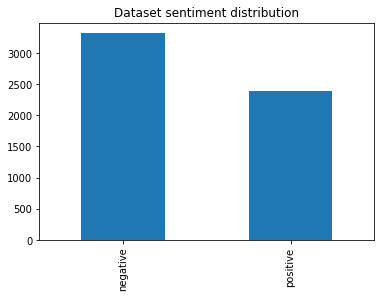

In [ ]:
# Some Tokens are None which we must drop first
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.sentiment!= 'na']
predictions.sentiment.value_counts().plot.bar(title='Dataset sentiment distribution')

## 3.3 Checkout sentiment distribution

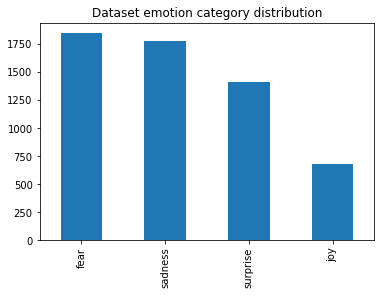

In [ ]:
predictions.category.value_counts().plot.bar(title='Dataset emotion category distribution')

# 4.Prepare data for T-SNE algorithm.
We create a Matrix with one row per Embedding vector for T-SNE algorithm

In [ ]:
import numpy as np

# Make a matrix from the vectors in the np_array column via list comprehension
mat = np.matrix([x for x in predictions.albert_embeddings])
mat.shape

(5703, 768)

## 4.1 Fit and transform T-SNE algorithm


In [ ]:

from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (5703, 2)


### Set plotting styles

In [ ]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)


# 4.2 Plot low dimensional T-SNE ALBERT embeddings with hue for POS


Text(0.5, 1.0, 'T-SNE ALBERT Embeddings, colored by Part of Speech Tag')

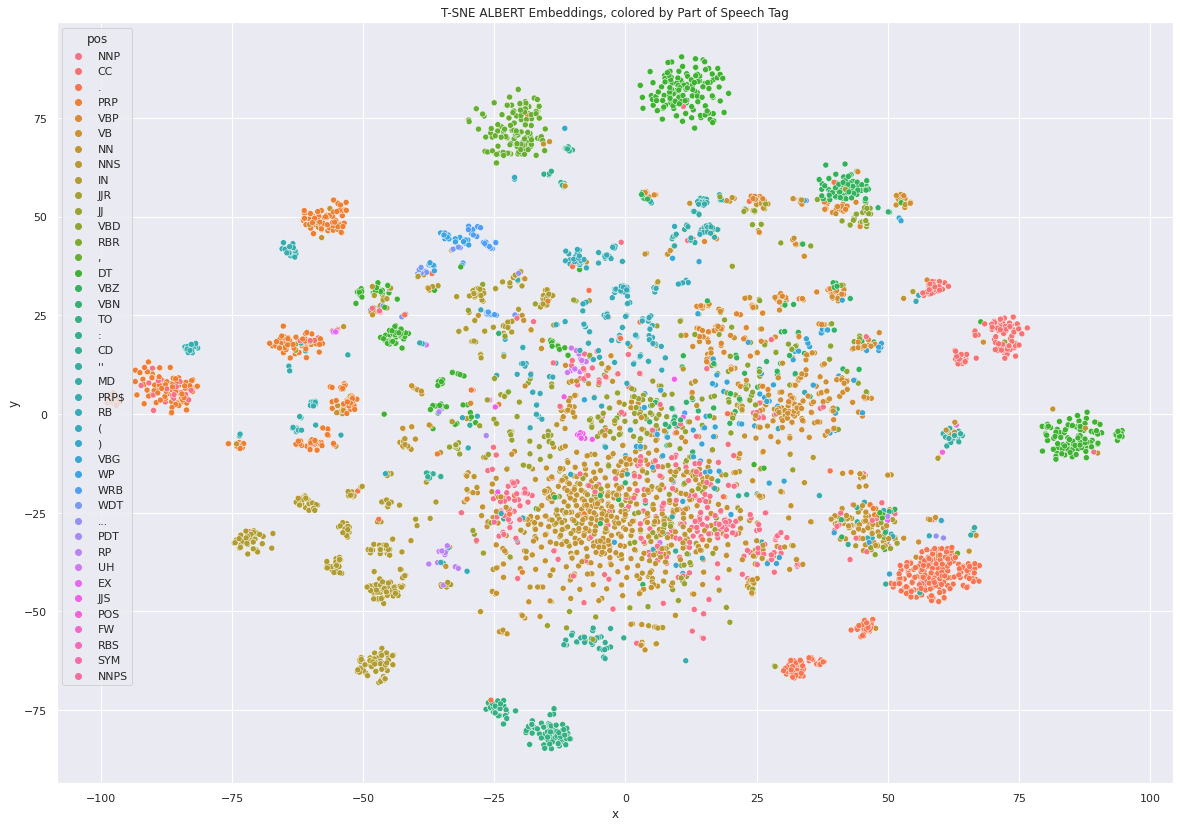

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.pos)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE ALBERT Embeddings, colored by Part of Speech Tag')


##4.3 Plot low dimensional T-SNE ALBERT embeddings with hue for Sarcasm


Text(0.5, 1.0, 'T-SNE ALBERT Embeddings, colored by Sarcasm label')

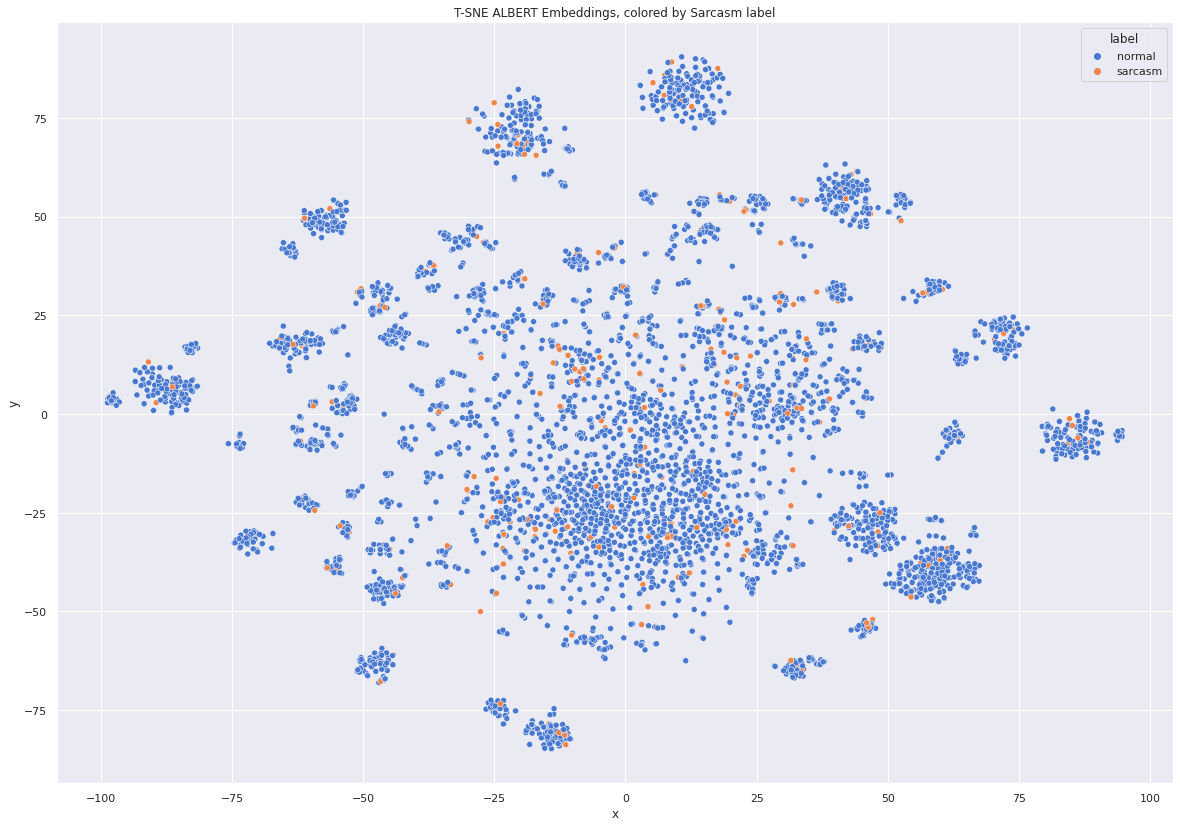

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.label.replace({1:'sarcasm',0:'normal'}))
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE ALBERT Embeddings, colored by Sarcasm label')


## 4.4 Plot low dimensional T-SNE ALBERT embeddings with hue for Sentiment

*   List item
*   List item




Text(0.5, 1.0, 'T-SNE ALBERT Embeddings, colored by Sentiment')

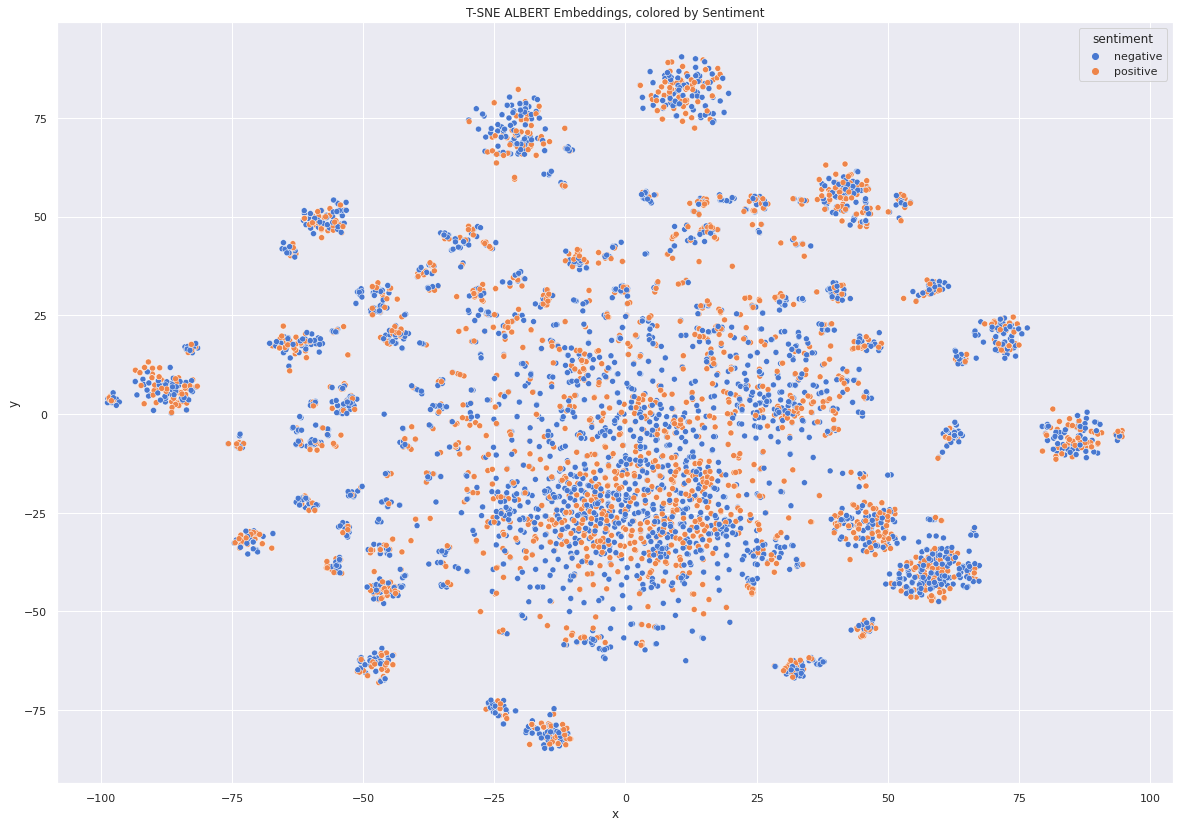

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE ALBERT Embeddings, colored by Sentiment')


# 4.5 Plot low dimensional T-SNE ALBERT embeddings with hue for Emotions


Text(0.5, 1.0, 'T-SNE ALBERT Embeddings, colored by Emotion')

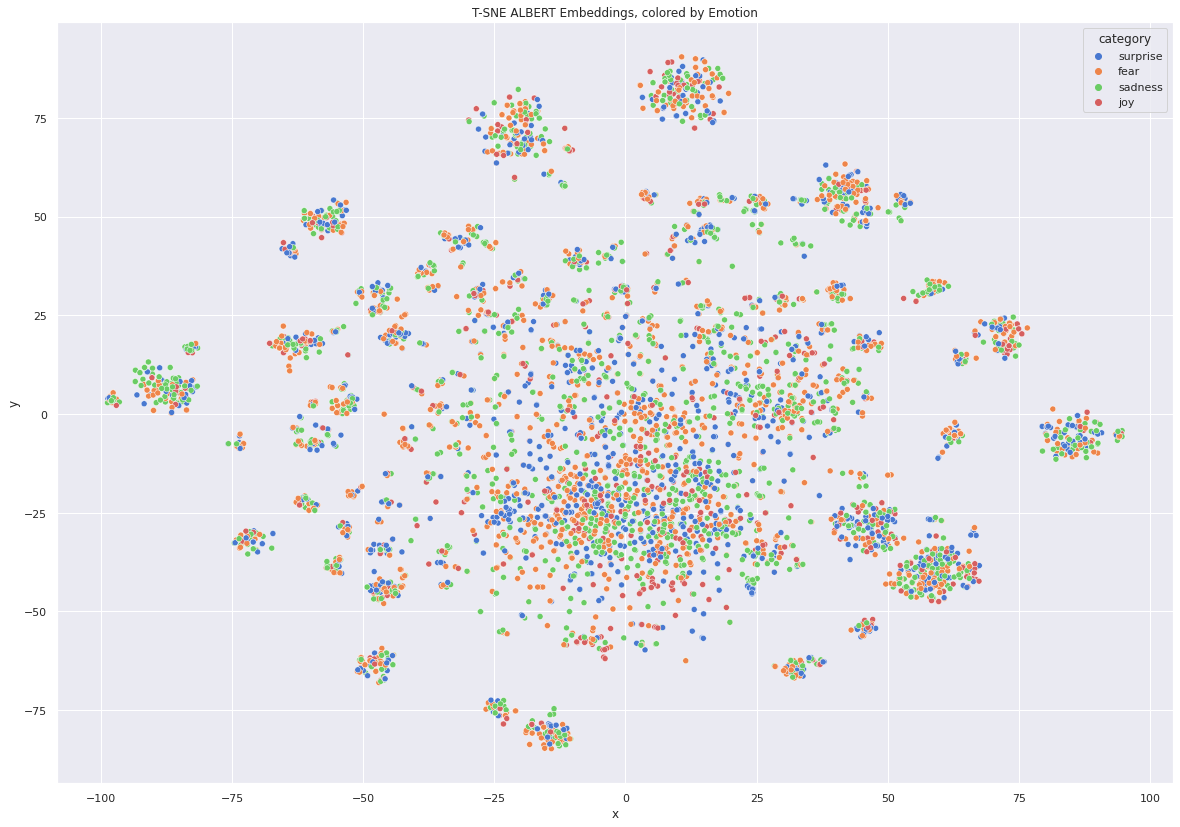

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.category)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE ALBERT Embeddings, colored by Emotion')


# 5. NLU has many more embedding models!      
Make sure to try them all out!       
You can change 'albert' in nlu.load('albert') to bert, xlnet, albert or any other of the **100+ word embeddings** offerd by NLU

In [ ]:
nlu.print_all_model_kinds_for_action('embed')

For language <en> NLU provides the following Models : 
nlu.load('en.embed') returns Spark NLP model glove_100d
nlu.load('en.embed.glove') returns Spark NLP model glove_100d
nlu.load('en.embed.glove.100d') returns Spark NLP model glove_100d
nlu.load('en.embed.bert') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_uncased') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_cased') returns Spark NLP model bert_base_cased
nlu.load('en.embed.bert.large_uncased') returns Spark NLP model bert_large_uncased
nlu.load('en.embed.bert.large_cased') returns Spark NLP model bert_large_cased
nlu.load('en.embed.biobert') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_base_cased') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_large_cased') returns Spark NLP model biobert_pubmed_large_cased
nlu.load('en.embed.biobert.pmc_base_cased') returns Spark NLP model biobert_pmc_base_cased
nlu.lo